# **TALENTO TECH**
# **RETO 1**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
import seaborn as sns


## 1) Cargar Datos

In [ ]:
df = pd.read_csv('/content/dataset_renovables_con_errores.csv')
df

,Planta Energética,Tipo de Energía,Nivel de Democratización Energética,Número de Comunidades Energéticas,Número de Proyectos en Marcha,Capacidad Generada (MW),Reducción de CO2 (toneladas),Región,Costo de Producción ($/MW),Año de Instalación,"Rentabilidad en 10 años (Rentable=1, No Rentable=0)"
0,SolarFlow,Solar,Alto,42,1.0,100.46,48910.59373127165,Sur,1893.656170,2005,1
1,SunWave,Solar,Bajo,12,17.0,NaN,156615.16814130466,Oeste,3398.187477,2015,0
2,EcoWind,NaN,Bajo,47,NaN,52.62,25618.907447138306,Sur,1642.900952,2010,0
3,SolarFlow,Geotérmica,NaN,24,11.0,NaN,381289.3836417021,Este,2796.374954,2010,1
4,HydroFlux,Hidrógeno verde,Medio,37,5.0,404.25,196815.72283363095,Norte,2144.411388,2020,1
...,...,...,...,...,...,...,...,...,...,...,...
995,EcoWind,Hidrógeno verde,Bajo,20,NaN,522.12,254202.65975484328,Norte,2996.979129,2020,1
996,Solaris,Eólica,Medio,23,7.0,NaN,203987.26419996214,Este,2846.525998,2010,1
997,SunWave,Eólica,Bajo,22,NaN,207.35,100951.73810650186,Norte,2896.677042,2005,0
998,VientoVerde,Eólica,Bajo,20,16.0,418.24,NaN,Este,2996.979129,2015,1


## 2) Explorar datos

In [ ]:
df.describe()

,Número de Proyectos en Marcha,Costo de Producción ($/MW),Año de Instalación,"Rentabilidad en 10 años (Rentable=1, No Rentable=0)"
count,810.000000,1000.000000,1000.000000,1000.00000
mean,10.262963,2620.846302,2012.175000,0.58400
std,5.447467,653.454384,5.605872,0.49314
min,1.000000,1542.598865,2005.000000,0.00000
25%,6.000000,2044.109301,2005.000000,0.00000
50%,10.000000,2620.846302,2010.000000,1.00000
75%,15.000000,3197.583303,2015.000000,1.00000
max,19.000000,3749.244782,2020.000000,1.00000



Filas



In [ ]:
df.shape[1]*df.shape[0]

11000

Columnas

In [ ]:
df.columns

Index(['Planta Energética', 'Tipo de Energía',
       'Nivel de Democratización Energética',
       'Número de Comunidades Energéticas', 'Número de Proyectos en Marcha',
       'Capacidad Generada (MW)', 'Reducción de CO2 (toneladas)', 'Región',
       'Costo de Producción ($/MW)', 'Año de Instalación',
       'Rentabilidad en 10 años (Rentable=1, No Rentable=0)'],
      dtype='object')

Tipo de datos

In [ ]:
df.dtypes

,0
Planta Energética,object
Tipo de Energía,object
Nivel de Democratización Energética,object
Número de Comunidades Energéticas,object
Número de Proyectos en Marcha,float64
Capacidad Generada (MW),object
Reducción de CO2 (toneladas),object
Región,object
Costo de Producción ($/MW),float64
Año de Instalación,int64


* Cualitativo Nominal

In [ ]:
df['Planta Energética'].value_counts()

,count
Planta Energética,
SunWave,145
VientoVerde,134
Solaris,133
EcoWind,124
SolarFlow,119
WindStream,116
HydroFlux,112
AquaPower,112
error,5


In [ ]:
df['Tipo de Energía'].value_counts()

,count
Tipo de Energía,
Solar,194
Hidráulica,193
Geotérmica,188
Eólica,188
Hidrógeno verde,159
error,7


In [ ]:
df['Región'].value_counts()

,count
Región,
Este,246
Sur,238
Oeste,230
Norte,224


* Cuantitatvivo Ordinal

In [ ]:
df['Nivel de Democratización Energética'].value_counts()

,count
Nivel de Democratización Energética,
Medio,369
Alto,268
Bajo,257
error,6


In [ ]:
df['Año de Instalación'].value_counts()

,count
Año de Instalación,
2005,277
2015,256
2010,239
2020,228


In [ ]:
df['Número de Comunidades Energéticas'].value_counts()

,count
Número de Comunidades Energéticas,
49,30
45,30
21,30
41,29
38,28
17,28
15,28
8,27
12,27


* El resto son cuantitaivas

## 3) Generar Estaditicas Descriptivas

In [ ]:
data_eliminados = df.dropna(subset=['Planta Energética'])
data_eliminados

,Planta Energética,Tipo de Energía,Nivel de Democratización Energética,Número de Comunidades Energéticas,Número de Proyectos en Marcha,Capacidad Generada (MW),Reducción de CO2 (toneladas),Región,Costo de Producción ($/MW),Año de Instalación,"Rentabilidad en 10 años (Rentable=1, No Rentable=0)"
0,SolarFlow,Solar,Alto,42,1.0,100.46,48910.59373127165,Sur,1893.656170,2005,1
1,SunWave,Solar,Bajo,12,17.0,NaN,156615.16814130466,Oeste,3398.187477,2015,0
2,EcoWind,NaN,Bajo,47,NaN,52.62,25618.907447138306,Sur,1642.900952,2010,0
3,SolarFlow,Geotérmica,NaN,24,11.0,NaN,381289.3836417021,Este,2796.374954,2010,1
4,HydroFlux,Hidrógeno verde,Medio,37,5.0,404.25,196815.72283363095,Norte,2144.411388,2020,1
...,...,...,...,...,...,...,...,...,...,...,...
995,EcoWind,Hidrógeno verde,Bajo,20,NaN,522.12,254202.65975484328,Norte,2996.979129,2020,1
996,Solaris,Eólica,Medio,23,7.0,NaN,203987.26419996214,Este,2846.525998,2010,1
997,SunWave,Eólica,Bajo,22,NaN,207.35,100951.73810650186,Norte,2896.677042,2005,0
998,VientoVerde,Eólica,Bajo,20,16.0,418.24,NaN,Este,2996.979129,2015,1


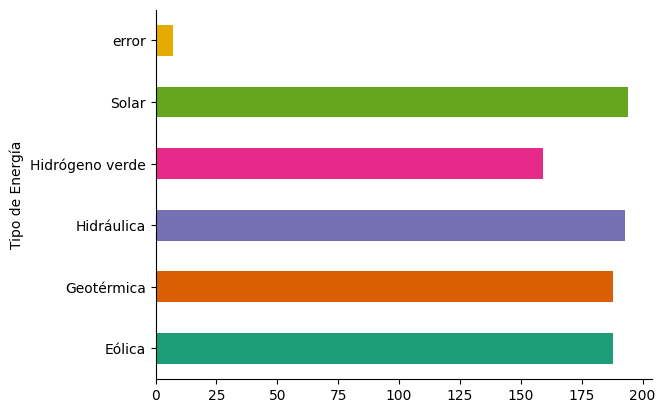

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('Tipo de Energía').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [159]:
Tipo_dato = ['media', 'mediana', 'desv_estandar', 'varianza', 'v_minimo', 'v_maximo', 'cantidad']

Planta_Energética_Est = [df['Número de Comunidades Energéticas'].mean(),
                         df['Número de Comunidades Energéticas'].median(),
                         df['Número de Comunidades Energéticas'].std(),
                         df['Número de Comunidades Energéticas'].var(),
                         df['Número de Comunidades Energéticas'].min(),
                         df['Número de Comunidades Energéticas'].max(),
                         df['Número de Comunidades Energéticas'].count()
                        ]

Número_Proyectos_Marcha_Est	= [df['Número de Proyectos en Marcha'].mean(),
                                     df['Número de Proyectos en Marcha'].median(),
                                     df['Número de Proyectos en Marcha'].std(),
                                     df['Número de Proyectos en Marcha'].var(),
                                     df['Número de Proyectos en Marcha'].min(),
                                     df['Número de Proyectos en Marcha'].max(),
                                     df['Número de Proyectos en Marcha'].count()
                                    ]

Capacidad_Generada_Est = [df['Capacidad Generada (MW)'].mean(),
                          df['Capacidad Generada (MW)'].median(),
                          df['Capacidad Generada (MW)'].std(),
                          df['Capacidad Generada (MW)'].var(),
                          df['Capacidad Generada (MW)'].min(),
                          df['Capacidad Generada (MW)'].max(),
                          df['Capacidad Generada (MW)'].count()
                         ]

Reducción_de_CO2 = [df['Reducción de CO2 (toneladas)'].mean(),
                    df['Reducción de CO2 (toneladas)'].median(), #Fixed typo here
                    df['Reducción de CO2 (toneladas)'].std(),
                    df['Reducción de CO2 (toneladas)'].var(),
                    df['Reducción de CO2 (toneladas)'].min(),
                    df['Reducción de CO2 (toneladas)'].max(),
                    df['Reducción de CO2 (toneladas)'].count()
                   ]
Costo_de_Producción = [df['Costo de Producción ($/MW)'].mean(),
                        df['Costo de Producción ($/MW)'].median(),
                        df['Costo de Producción ($/MW)'].std(),
                        df['Costo de Producción ($/MW)'].var(),
                        df['Costo de Producción ($/MW)'].min(),
                        df['Costo de Producción ($/MW)'].max(),
                        df['Costo de Producción ($/MW)'].count()
                       ]

Año_de_Instalación = [map(int, df['Año de Instalación'].unique())]




In [111]:
df_est = pd.DataFrame({
  'Tipo_dato': Tipo_dato,
  'Planta_Energética_Est': Planta_Energética_Est,
  'Número_Proyectos_Marcha_Est': Número_Proyectos_Marcha_Est,
  'Capacidad_Generada_Est': Capacidad_Generada_Est,
  'Reducción_de_CO2': Reducción_de_CO2,
  'Costo_de_Producción': Costo_de_Producción,
})
df_est

,Tipo_dato,Planta_Energética_Est,Número_Proyectos_Marcha_Est,Capacidad_Generada_Est,Reducción_de_CO2,Costo_de_Producción
0,media,27.523618,10.262963,494.468248,2.400995e+05,2620.846302
1,mediana,27.523618,10.262963,494.468248,2.400995e+05,2620.846302
2,desv_estandar,13.001432,4.902144,260.617295,1.355781e+05,653.454384
3,varianza,169.037232,24.031020,67921.374285,1.838143e+10,427002.631331
4,v_minimo,5.000000,1.000000,10.180000,4.956299e+03,1542.598865
5,v_maximo,49.000000,19.000000,997.650000,4.857222e+05,3749.244782
6,cantidad,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000


{'whiskers': [<matplotlib.lines.Line2D at 0x785c0dafd1e0>,
 'caps': [<matplotlib.lines.Line2D at 0x785c0dafd720>,
 'boxes': [<matplotlib.lines.Line2D at 0x785c0dafcf40>,
 'medians': [<matplotlib.lines.Line2D at 0x785c0dafdc60>,
 'fliers': [<matplotlib.lines.Line2D at 0x785c0dafdf00>,
 'means': []}

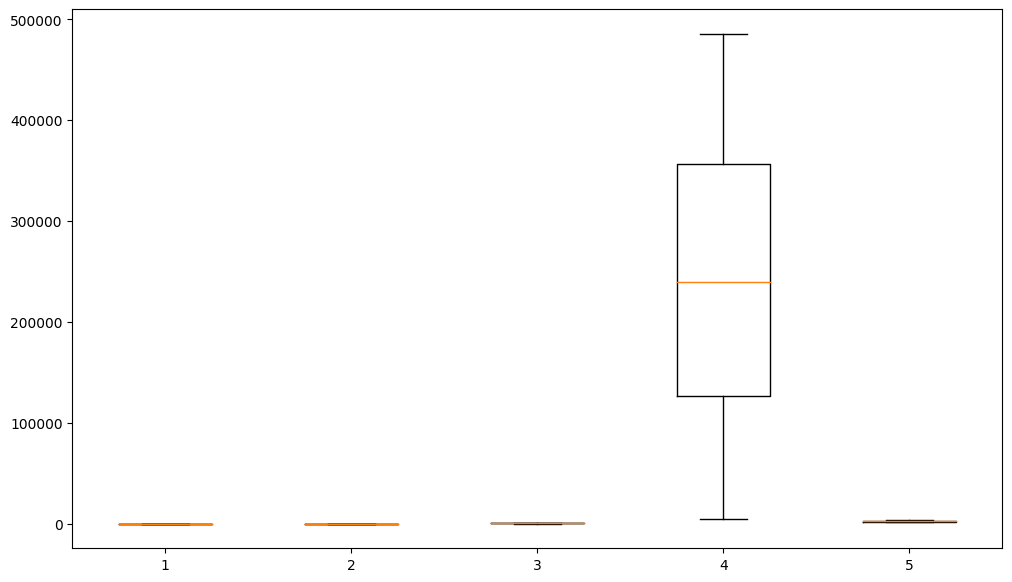

In [109]:
df_bigotes = [df['Número de Comunidades Energéticas'],
              df['Número de Proyectos en Marcha'],
              df['Capacidad Generada (MW)'],
              df['Reducción de CO2 (toneladas)'],
              df['Costo de Producción ($/MW)']
             ]

plt.figure(figsize=(12, 7))
plt.boxplot(df_bigotes)



In [112]:
data_eliminados.isnull().sum()

,0
Planta Energética,0
Tipo de Energía,71
Nivel de Democratización Energética,100
Número de Comunidades Energéticas,0
Número de Proyectos en Marcha,190
Capacidad Generada (MW),168
Reducción de CO2 (toneladas),57
Región,62
Costo de Producción ($/MW),0
Año de Instalación,0


In [113]:
df['Número de Comunidades Energéticas'].isnull().sum()

0

(array([119., 145., 124., 112.,   0., 134., 116.,   5., 112., 133.]),
 array([0. , 0.8, 1.6, 2.4, 3.2, 4. , 4.8, 5.6, 6.4, 7.2, 8. ]),
 <BarContainer object of 10 artists>)

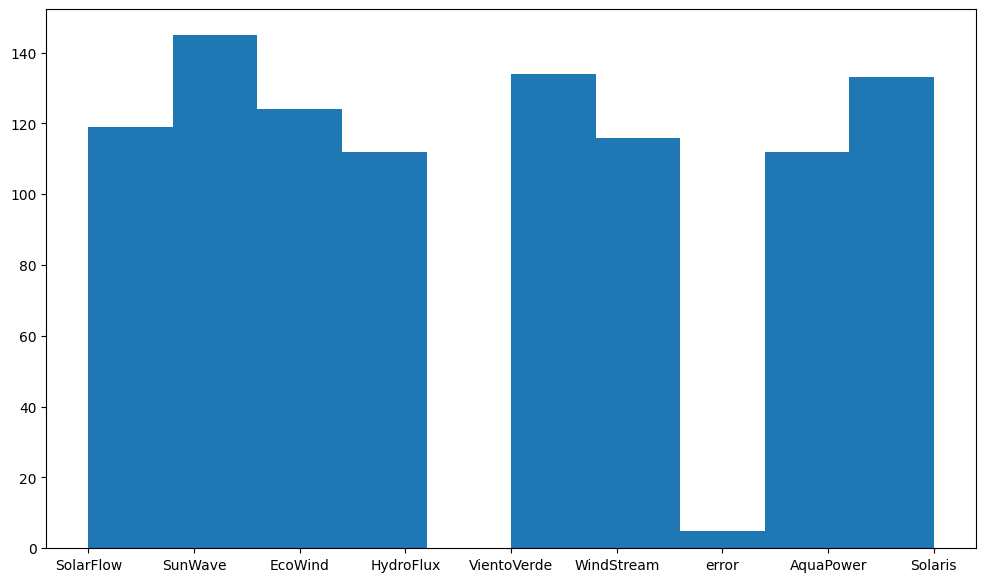

In [114]:
plt.figure(figsize=(12, 7))
plt.hist(df['Planta Energética'])


In [115]:
df['Tipo de Energía'].isnull().sum()

71

<Axes: >

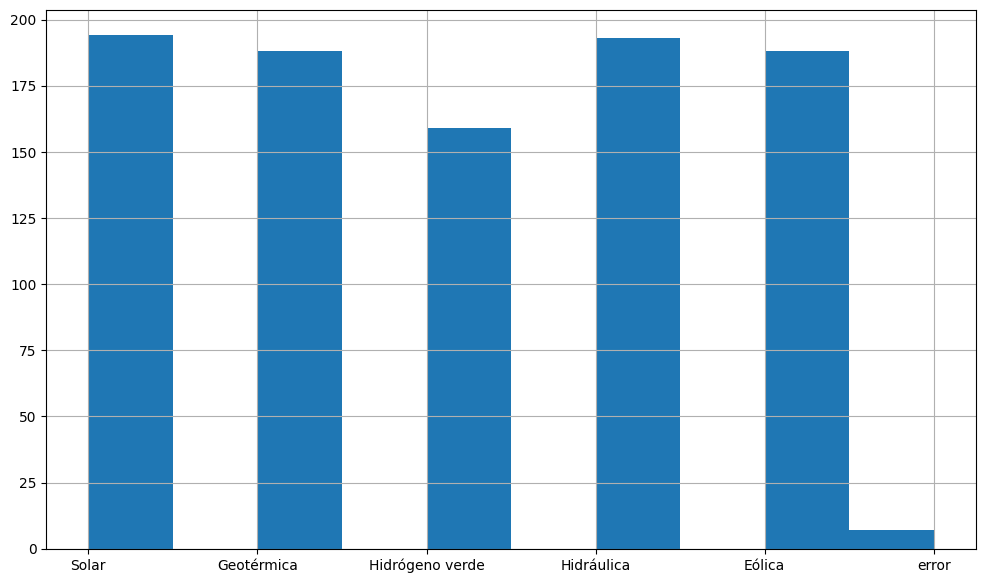

In [116]:
plt.figure(figsize=(12, 7))
(df['Tipo de Energía']).hist()


<Axes: >

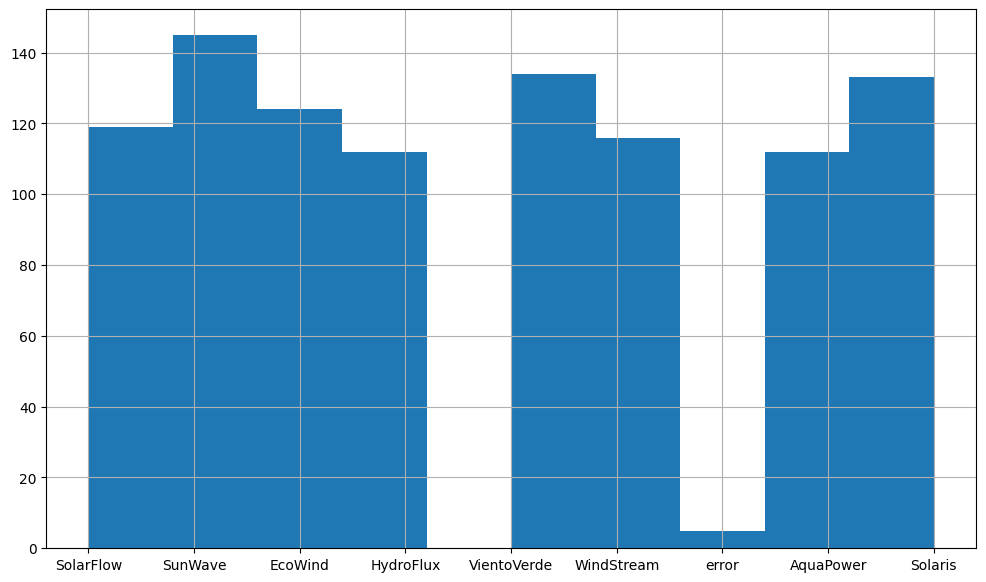

In [117]:
plt.figure(figsize=(12, 7))
(df['Planta Energética']).hist()


<Axes: >

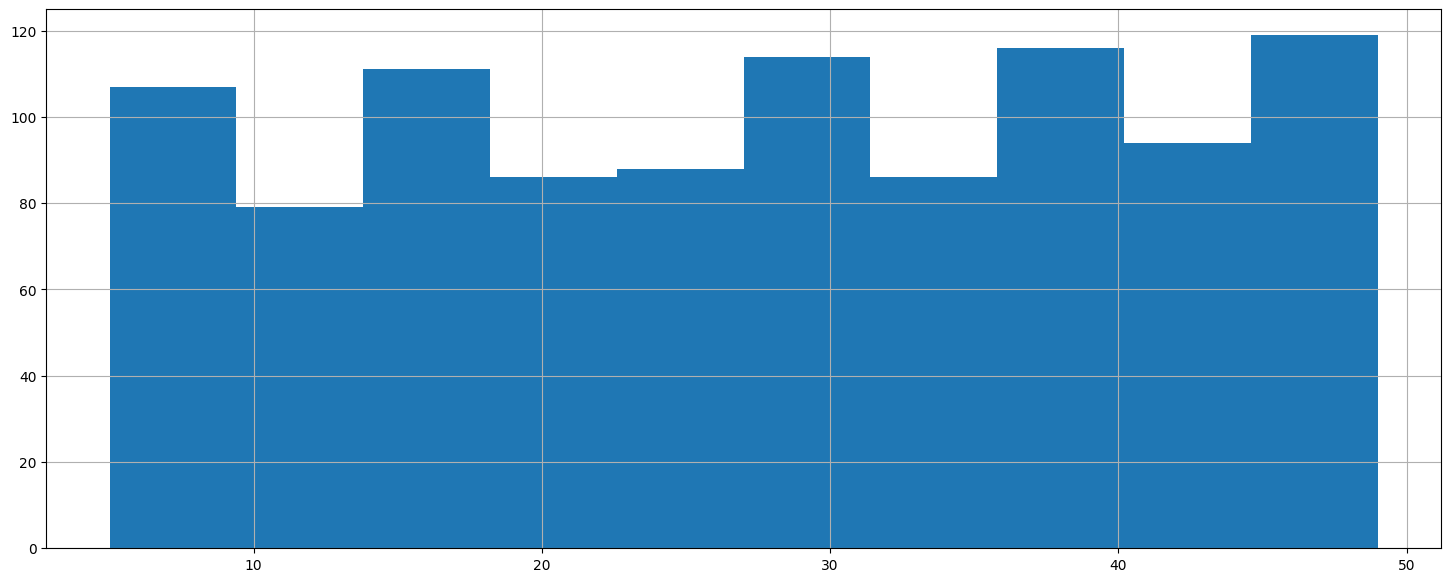

In [118]:
plt.figure(figsize=(18, 7))
(df['Número de Comunidades Energéticas']).hist()

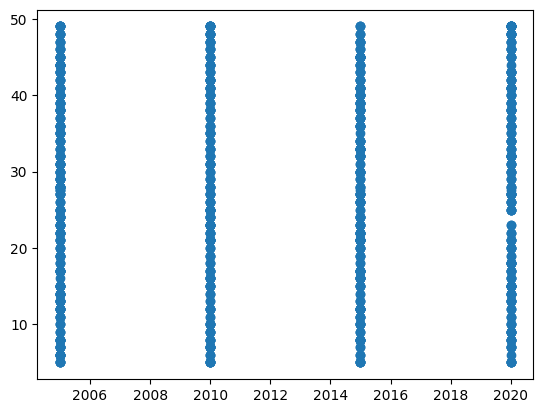

In [119]:
plt.scatter(df['Año de Instalación'], df['Número de Comunidades Energéticas'])

## 4) Dimension de la calidad de datos

In [120]:
df.isnull().sum()

,0
Planta Energética,0
Tipo de Energía,71
Nivel de Democratización Energética,100
Número de Comunidades Energéticas,0
Número de Proyectos en Marcha,0
Capacidad Generada (MW),0
Reducción de CO2 (toneladas),0
Región,62
Costo de Producción ($/MW),0
Año de Instalación,0


In [121]:
data_eliminados_te = df.copy()
data_eliminados_te.head()

,Planta Energética,Tipo de Energía,Nivel de Democratización Energética,Número de Comunidades Energéticas,Número de Proyectos en Marcha,Capacidad Generada (MW),Reducción de CO2 (toneladas),Región,Costo de Producción ($/MW),Año de Instalación,"Rentabilidad en 10 años (Rentable=1, No Rentable=0)"
0,SolarFlow,Solar,Alto,42.0,1.000000,100.460000,48910.593731,Sur,1893.656170,2005,1
1,SunWave,Solar,Bajo,12.0,17.000000,494.468248,156615.168141,Oeste,3398.187477,2015,0
2,EcoWind,NaN,Bajo,47.0,10.262963,52.620000,25618.907447,Sur,1642.900952,2010,0
3,SolarFlow,Geotérmica,NaN,24.0,11.000000,494.468248,381289.383642,Este,2796.374954,2010,1
4,HydroFlux,Hidrógeno verde,Medio,37.0,5.000000,404.250000,196815.722834,Norte,2144.411388,2020,1


In [122]:
data_eliminados['Número de Comunidades Energéticas'].isnull().sum()

0

In [123]:
df.isnull().sum()

,0
Planta Energética,0
Tipo de Energía,71
Nivel de Democratización Energética,100
Número de Comunidades Energéticas,0
Número de Proyectos en Marcha,0
Capacidad Generada (MW),0
Reducción de CO2 (toneladas),0
Región,62
Costo de Producción ($/MW),0
Año de Instalación,0


## 6)Limpieza de datos

In [124]:
df.describe()

,Número de Comunidades Energéticas,Número de Proyectos en Marcha,Capacidad Generada (MW),Reducción de CO2 (toneladas),Costo de Producción ($/MW),Año de Instalación,"Rentabilidad en 10 años (Rentable=1, No Rentable=0)"
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,27.523618,10.262963,494.468248,240099.515545,2620.846302,2012.175000,0.58400
std,13.001432,4.902144,260.617295,135578.147382,653.454384,5.605872,0.49314
min,5.000000,1.000000,10.180000,4956.299464,1542.598865,2005.000000,0.00000
25%,16.000000,7.000000,299.587500,127118.370200,2044.109301,2005.000000,0.00000
50%,27.523618,10.262963,494.468248,240099.515545,2620.846302,2010.000000,1.00000
75%,39.000000,14.000000,692.315000,356309.488282,3197.583303,2015.000000,1.00000
max,49.000000,19.000000,997.650000,485722.216166,3749.244782,2020.000000,1.00000


In [125]:
var = ['Número de Comunidades Energéticas','Número de Proyectos en Marcha','Capacidad Generada (MW)','Reducción de CO2 (toneladas)','Costo de Producción ($/MW)']
for columna in var:
  df[columna] = df[columna].replace(['null', ' NA', '@#$'], np.nan)

In [126]:
df['Número de Proyectos en Marcha'].value_counts()

,count
Número de Proyectos en Marcha,
10.262963,190
17.000000,58
15.000000,55
13.000000,54
8.000000,52
3.000000,47
16.000000,47
1.000000,42
6.000000,41


In [127]:
df[['Capacidad Generada (MW)']].replace('@#$', np.nan, inplace=True)

<ipython-input-127-196c01e3e81c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['Capacidad Generada (MW)']].replace('@#$', np.nan, inplace=True)


In [128]:
df.isnull().sum()

,0
Planta Energética,0
Tipo de Energía,71
Nivel de Democratización Energética,100
Número de Comunidades Energéticas,0
Número de Proyectos en Marcha,0
Capacidad Generada (MW),0
Reducción de CO2 (toneladas),0
Región,62
Costo de Producción ($/MW),0
Año de Instalación,0


In [129]:
df['Número de Comunidades Energéticas']

,Número de Comunidades Energéticas
0,42.0
1,12.0
2,47.0
3,24.0
4,37.0
...,...
995,20.0
996,23.0
997,22.0
998,20.0




---

## 6) Deteccion y tratamiento de los datos auentes

In [130]:
df.value_counts()

Planta Energética  Tipo de Energía  Nivel de Democratización Energética  Número de Comunidades Energéticas  Número de Proyectos en Marcha  Capacidad Generada (MW)  Reducción de CO2 (toneladas)  Región  Costo de Producción ($/MW)  Año de Instalación  Rentabilidad en 10 años (Rentable=1, No Rentable=0)
AquaPower          Eólica           Alto                                 9.0                                18.000000                      175.790000               85586.236034                  Sur     3548.640608                 2020                0                                                      1
SunWave            Geotérmica       Bajo                                 44.0                               16.000000                      130.890000               63725.936825                  Norte   1793.354083                 2010                0                                                      1
                                    Medio                                5.0                                10.262963                      494.468248               227838.846789                 Este    3749.244782                 2010                1                                                      1
                                                                         21.0                               10.262963                      494.468248               404839.109092                 Este    2946.828085                 2015                0                                                      1
                                                                         37.0                               4.000000                       290.530000               141449.281274                 Oeste   2144.411388                 2015                1                                                      1
                                                                                                                                                                                                                                                                                                                ..
HydroFlux          Solar            Bajo                                 20.0                               10.262963                      965.560000               240099.515545                 Este    2996.979129                 2020                0                                                      1
                                                                         23.0                               10.000000                      271.830000               132344.880489                 Oeste   2846.525998                 2015                0                                                      1
                                                                         28.0                               3.000000                       734.250000               357481.619024                 Norte   2595.770780                 2005                1                                                      1
                                                                         40.0                               18.000000                      419.540000               204259.909357                 Este    1993.958257                 2015                0                                                      1
error              Solar            Bajo                                 30.0                               12.000000                      607.300000               295673.935626                 Este    2495.468693                 2005                0                                                      1
Name: count, Length: 785, dtype: int64

## 7)Cálculo y visualización de matrices de correlación.

<Axes: >

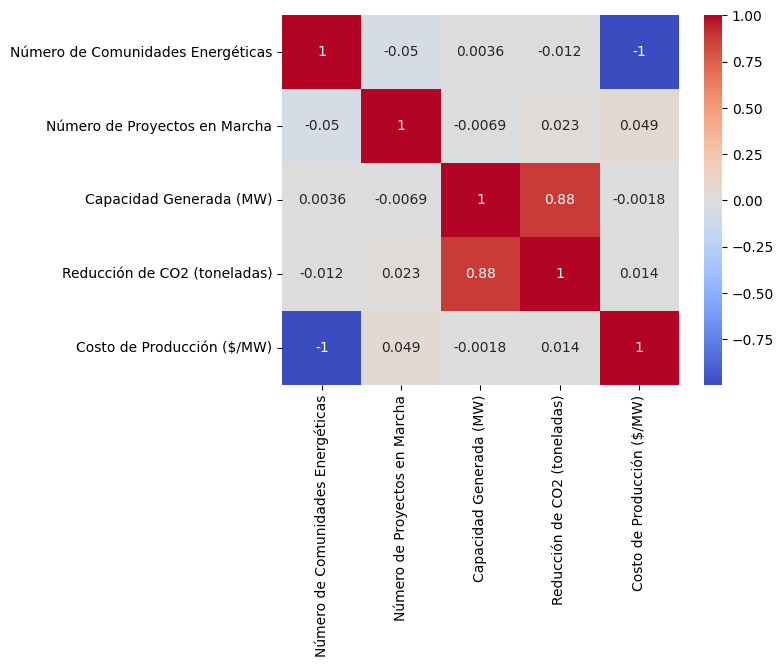

In [131]:
correlacion = df[['Número de Comunidades Energéticas','Número de Proyectos en Marcha','Capacidad Generada (MW)','Reducción de CO2 (toneladas)','Costo de Producción ($/MW)']].corr()

sns.heatmap(correlacion, annot=True, cmap='coolwarm')

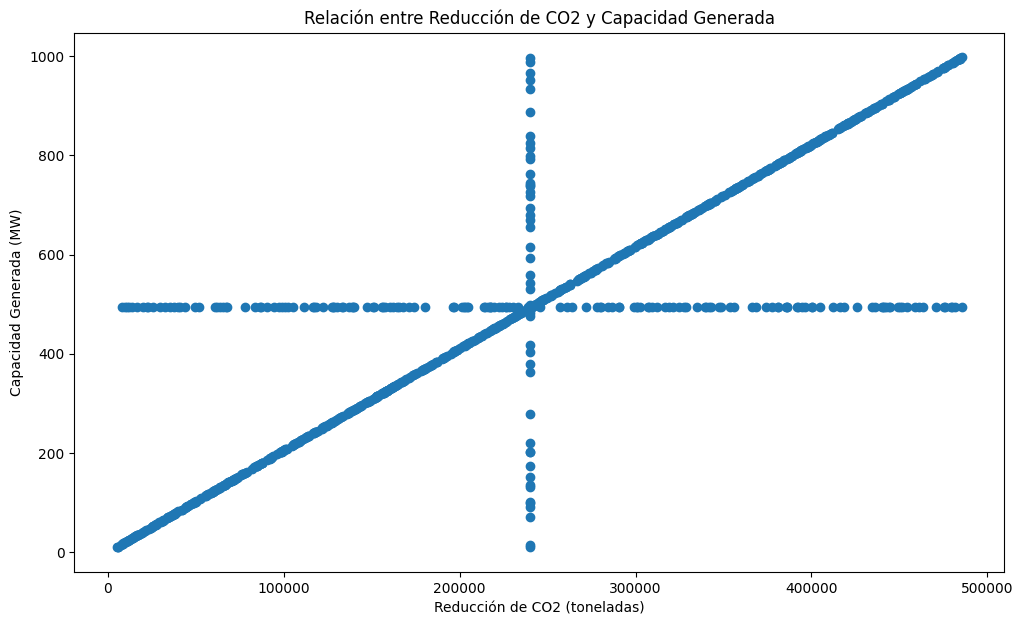

In [164]:
df['Reducción de CO2 (toneladas)'] = pd.to_numeric(df['Reducción de CO2 (toneladas)'])
df['Capacidad Generada (MW)'] = pd.to_numeric(df['Capacidad Generada (MW)'])

plt.figure(figsize=(12, 7))
plt.scatter(df['Reducción de CO2 (toneladas)'], df['Capacidad Generada (MW)'])

plt.xlabel('Reducción de CO2 (toneladas)')
plt.ylabel('Capacidad Generada (MW)')
plt.title('Relación entre Reducción de CO2 y Capacidad Generada')
plt.show()

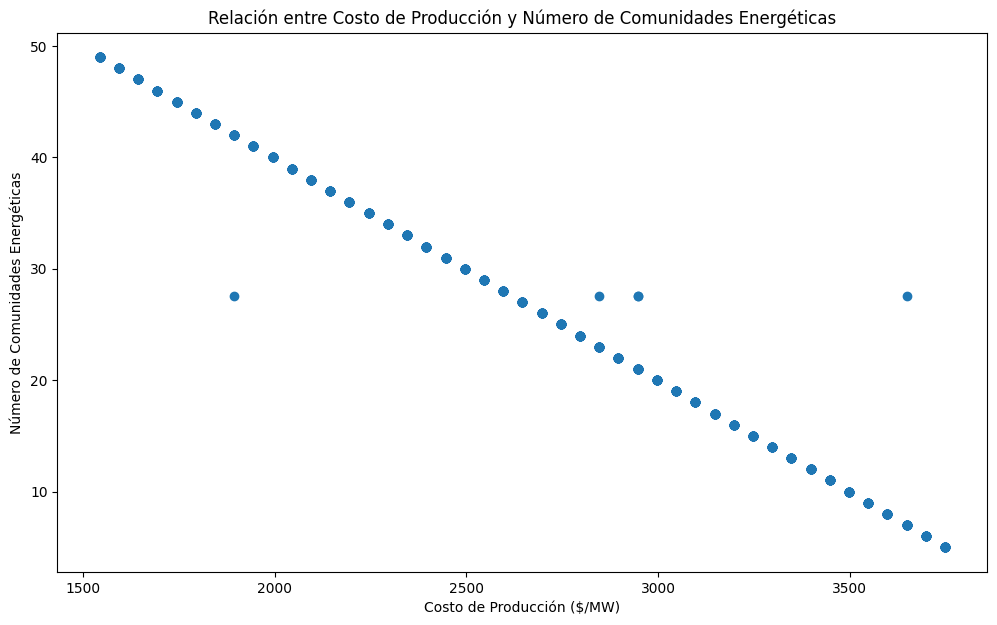

In [163]:
df['Costo de Producción ($/MW)'] = pd.to_numeric(df['Costo de Producción ($/MW)'])
df['Número de Comunidades Energéticas'] = pd.to_numeric(df['Número de Comunidades Energéticas'])

plt.figure(figsize=(12, 7))
plt.scatter(df['Costo de Producción ($/MW)'], df['Número de Comunidades Energéticas'])

plt.xlabel('Costo de Producción ($/MW)')
plt.ylabel('Número de Comunidades Energéticas')
plt.title('Relación entre Costo de Producción y Número de Comunidades Energéticas')
plt.show()

## 8)Normalización de Datos: Aplicar técnicas de Min-Max Scaling y escalado robusto para normalizar los datos y mejorar el rendimiento del modelo.

In [134]:
df.isnull().sum()

,0
Planta Energética,0
Tipo de Energía,71
Nivel de Democratización Energética,100
Número de Comunidades Energéticas,0
Número de Proyectos en Marcha,0
Capacidad Generada (MW),0
Reducción de CO2 (toneladas),0
Región,62
Costo de Producción ($/MW),0
Año de Instalación,0


In [135]:
df['Número de Proyectos en Marcha'].fillna(df['Número de Proyectos en Marcha'].mean(), inplace=True)

In [136]:
df.isnull().sum()

,0
Planta Energética,0
Tipo de Energía,71
Nivel de Democratización Energética,100
Número de Comunidades Energéticas,0
Número de Proyectos en Marcha,0
Capacidad Generada (MW),0
Reducción de CO2 (toneladas),0
Región,62
Costo de Producción ($/MW),0
Año de Instalación,0


In [137]:
df.dtypes


,0
Planta Energética,object
Tipo de Energía,object
Nivel de Democratización Energética,object
Número de Comunidades Energéticas,float64
Número de Proyectos en Marcha,float64
Capacidad Generada (MW),float64
Reducción de CO2 (toneladas),float64
Región,object
Costo de Producción ($/MW),float64
Año de Instalación,int64


In [138]:
df['Capacidad Generada (MW)'] = pd.to_numeric(df['Capacidad Generada (MW)'])
print(df['Capacidad Generada (MW)'].dtype)

float64


In [139]:
df['Capacidad Generada (MW)'].fillna(df['Capacidad Generada (MW)'].mean(), inplace=True)

In [140]:
df.isnull().sum()

,0
Planta Energética,0
Tipo de Energía,71
Nivel de Democratización Energética,100
Número de Comunidades Energéticas,0
Número de Proyectos en Marcha,0
Capacidad Generada (MW),0
Reducción de CO2 (toneladas),0
Región,62
Costo de Producción ($/MW),0
Año de Instalación,0


In [141]:
df['Reducción de CO2 (toneladas)'] = pd.to_numeric(df['Reducción de CO2 (toneladas)'])
print(df['Reducción de CO2 (toneladas)'].dtype)

float64


In [142]:
df['Reducción de CO2 (toneladas)'].fillna(df['Reducción de CO2 (toneladas)'].mean(), inplace=True)

In [143]:
df.isnull().sum()

,0
Planta Energética,0
Tipo de Energía,71
Nivel de Democratización Energética,100
Número de Comunidades Energéticas,0
Número de Proyectos en Marcha,0
Capacidad Generada (MW),0
Reducción de CO2 (toneladas),0
Región,62
Costo de Producción ($/MW),0
Año de Instalación,0


In [144]:
df['Número de Comunidades Energéticas'] = pd.to_numeric(df['Número de Comunidades Energéticas'])
print(df['Número de Comunidades Energéticas'].dtype)

float64


In [145]:
df['Número de Comunidades Energéticas'].fillna(df['Número de Comunidades Energéticas'].mean(), inplace=True)

In [146]:
df.isnull().sum()

,0
Planta Energética,0
Tipo de Energía,71
Nivel de Democratización Energética,100
Número de Comunidades Energéticas,0
Número de Proyectos en Marcha,0
Capacidad Generada (MW),0
Reducción de CO2 (toneladas),0
Región,62
Costo de Producción ($/MW),0
Año de Instalación,0


In [155]:
tde = df['Nivel de Democratización Energética']
tde

,Nivel de Democratización Energética
0,Alto
1,Bajo
2,Bajo
3,NaN
4,Medio
...,...
995,Bajo
996,Medio
997,Bajo
998,Bajo


In [156]:
tipo_de_energia_num = pd.get_dummies(df['Tipo de Energía'], columns=['Tipo de Energía'], dtype=float)
tipo_de_energia_num

,Eólica,Geotérmica,Hidráulica,Hidrógeno verde,Solar,error
0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...
995,0.0,0.0,0.0,1.0,0.0,0.0
996,1.0,0.0,0.0,0.0,0.0,0.0
997,1.0,0.0,0.0,0.0,0.0,0.0
998,1.0,0.0,0.0,0.0,0.0,0.0


In [158]:
nivel_de_demo_energetica_num = pd.get_dummies(df['Nivel de Democratización Energética'], columns=['Nivel de Democratización Energética'], dtype=float)
nivel_de_demo_energetica_num

,Alto,Bajo,Medio,error
0,1.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0
2,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0
...,...,...,...,...
995,0.0,1.0,0.0,0.0
996,0.0,0.0,1.0,0.0
997,0.0,1.0,0.0,0.0
998,0.0,1.0,0.0,0.0


In [157]:
region_num = pd.get_dummies(df['Región'], columns=['Región'], dtype=float)
region_num

,Este,Norte,Oeste,Sur
0,0.0,0.0,0.0,1.0
1,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,1.0
3,1.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0
...,...,...,...,...
995,0.0,1.0,0.0,0.0
996,1.0,0.0,0.0,0.0
997,0.0,1.0,0.0,0.0
998,1.0,0.0,0.0,0.0


In [162]:
nominaul_num = pd.concat([tipo_de_energia_num, nivel_de_demo_energetica_num, region_num], axis=1)
nominaul_num

,Eólica,Geotérmica,Hidráulica,Hidrógeno verde,Solar,error,Alto,Bajo,Medio,error,Este,Norte,Oeste,Sur
0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
996,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
997,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
998,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


In [165]:
df_num = pd.concat([df[['Número de Comunidades Energéticas','Número de Proyectos en Marcha','Capacidad Generada (MW)','Reducción de CO2 (toneladas)','Costo de Producción ($/MW)', 'Rentabilidad en 10 años (Rentable=1, No Rentable=0)']], nominaul_num], axis=1)
df_num

,Número de Comunidades Energéticas,Número de Proyectos en Marcha,Capacidad Generada (MW),Reducción de CO2 (toneladas),Costo de Producción ($/MW),"Rentabilidad en 10 años (Rentable=1, No Rentable=0)",Eólica,Geotérmica,Hidráulica,Hidrógeno verde,Solar,error,Alto,Bajo,Medio,error,Este,Norte,Oeste,Sur
0,42.0,1.000000,100.460000,48910.593731,1893.656170,1,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,12.0,17.000000,494.468248,156615.168141,3398.187477,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,47.0,10.262963,52.620000,25618.907447,1642.900952,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,24.0,11.000000,494.468248,381289.383642,2796.374954,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,37.0,5.000000,404.250000,196815.722834,2144.411388,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,20.0,10.262963,522.120000,254202.659755,2996.979129,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
996,23.0,7.000000,494.468248,203987.264200,2846.525998,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
997,22.0,10.262963,207.350000,100951.738107,2896.677042,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
998,20.0,16.000000,418.240000,240099.515545,2996.979129,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


In [166]:
df_num.dtypes

,0
Número de Comunidades Energéticas,float64
Número de Proyectos en Marcha,float64
Capacidad Generada (MW),float64
Reducción de CO2 (toneladas),float64
Costo de Producción ($/MW),float64
"Rentabilidad en 10 años (Rentable=1, No Rentable=0)",int64
Eólica,float64
Geotérmica,float64
Hidráulica,float64
Hidrógeno verde,float64


In [167]:
df_num.isnull().sum()

,0
Número de Comunidades Energéticas,0
Número de Proyectos en Marcha,0
Capacidad Generada (MW),0
Reducción de CO2 (toneladas),0
Costo de Producción ($/MW),0
"Rentabilidad en 10 años (Rentable=1, No Rentable=0)",0
Eólica,0
Geotérmica,0
Hidráulica,0
Hidrógeno verde,0
